In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from math import pi
%matplotlib inline

In [12]:
df = pd.read_csv('fifa.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
#Categorizing positions into 3 main categories 1.Defenders  2.Midfielders  3.Attackers

pos_field = {'Def': re.findall(r"\wB|\w\wB",str([x for x in positions])),
            'Mid': re.findall(r"\wM|\w\wM",str([x for x in positions])),
            'Att': list(set(re.findall(r"\wS|\wF|\wW",str([x for x in positions]))))}

In [14]:
positions = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB']

In [15]:
#printing all the top 10 players by position for reference
for i in positions:
    print('\n\n','Top 10', i, 'in FIFA 19', '\n')
    print(df.sort_values(i, ascending=False).head(10).reset_index()[['Name', 'Nationality', 'Club', 'Overall']])



 Top 10 CAM in FIFA 19 

                Name Nationality                 Club  Overall
0           L. Messi   Argentina         FC Barcelona       94
1          Neymar Jr      Brazil  Paris Saint-Germain       92
2          E. Hazard     Belgium              Chelsea       91
3  Cristiano Ronaldo    Portugal             Juventus       94
4       K. De Bruyne     Belgium      Manchester City       91
5          P. Dybala   Argentina             Juventus       89
6        David Silva       Spain      Manchester City       90
7           Coutinho      Brazil         FC Barcelona       88
8          L. Modrić     Croatia          Real Madrid       91
9          K. Mbappé      France  Paris Saint-Germain       88


 Top 10 CB in FIFA 19 

            Name  Nationality                 Club  Overall
0   Sergio Ramos        Spain          Real Madrid       91
1       D. Godín      Uruguay      Atlético Madrid       90
2   G. Chiellini        Italy             Juventus       89
3    V. van Di

                Name Nationality                 Club  Overall
0           L. Messi   Argentina         FC Barcelona       94
1          Neymar Jr      Brazil  Paris Saint-Germain       92
2          E. Hazard     Belgium              Chelsea       91
3  Cristiano Ronaldo    Portugal             Juventus       94
4       A. Griezmann      France      Atlético Madrid       89
5       K. De Bruyne     Belgium      Manchester City       91
6           M. Salah       Egypt            Liverpool       88
7          K. Mbappé      France  Paris Saint-Germain       88
8          P. Dybala   Argentina             Juventus       89
9          L. Suárez     Uruguay         FC Barcelona       91


 Top 10 LWB in FIFA 19 

            Name Nationality             Club  Overall
0        Marcelo      Brazil      Real Madrid       88
1       N. Kanté      France          Chelsea       89
2     Jordi Alba       Spain     FC Barcelona       87
3    Alex Sandro      Brazil         Juventus       86
4  R.

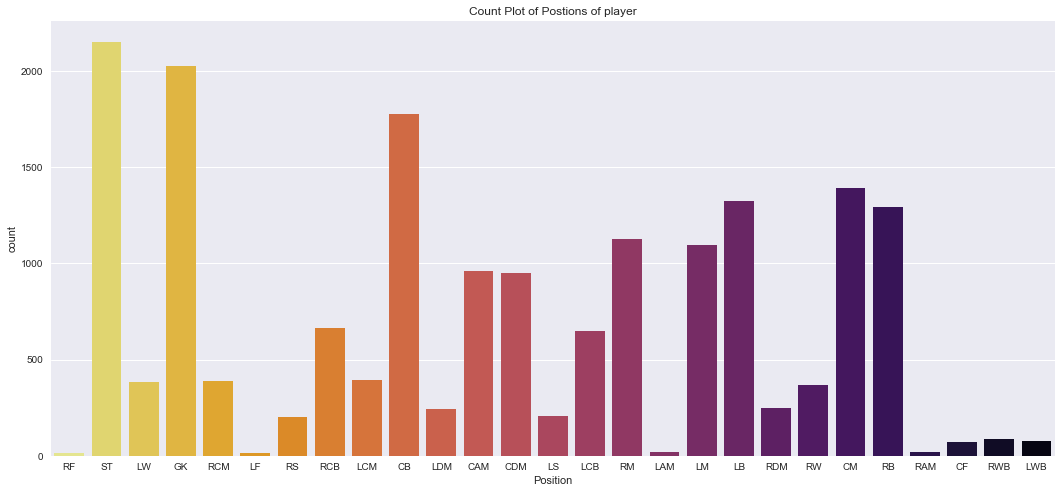

In [16]:
plt.figure(1 , figsize = (18 , 8))
sns.countplot(x = 'Position' , data = df , palette = 'inferno_r' )
plt.title('Count Plot of Postions of player')
plt.show()

In [17]:
player_features = ['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [18]:
for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Strength, Jumping, StandingTackle
Position CDM: Stamina, Aggression, Strength
Position CF: Agility, Balance, Acceleration
Position CM: Balance, ShortPassing, Agility
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, SprintSpeed
Position LB: SprintSpeed, Acceleration, Stamina
Position LCB: Strength, Jumping, StandingTackle
Position LCM: Stamina, ShortPassing, Balance
Position LDM: Stamina, ShortPassing, Strength
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, SprintSpeed, Agility
Position LS: SprintSpeed, Strength, Acceleration
Position LW: Acceleration, SprintSpeed, Agility
Position LWB: SprintSpeed, Acceleration, Stamina
Position RAM: Agility, Balance, Acceleration
Position RB: SprintSpeed, Stamina, Acceleration
Position RCB: Strength, Jumping, Aggression
Position RCM: Stamina, ShortPassing, Agility
Position RDM: Stamina, ShortPassing, Aggression
Position RF: Agility, Accele